In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Beta-распределение
В качестве распределения взято beta-распределение 
с параметрами alpha = 2, beta = 5

https://en.wikipedia.org/wiki/Beta_distribution

# Первая часть задания

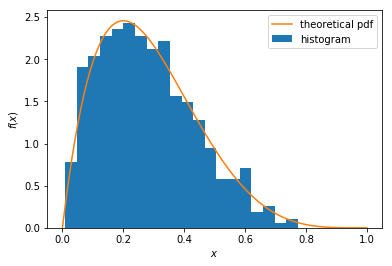

In [6]:
# Создаем beta-распределение с параметрами 2., 5.
beta_rv = sts.beta(2., 5.)

# Создаем выборку из 1000 элементов
sample = beta_rv.rvs(1000)
                   
# Строим гистограмму по выборке          
plt.hist(sample, bins = 20, normed=True, histtype='bar', label='histogram')              

# Рисуем график теоретической плотности распределения
x = np.linspace(0,1,100)
pdf = beta_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf')
                   
# Добавляем легенду и подписи
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Отрисовываем
plt.show()

# Вторая часть задания
## Разные вспомогательные функции

In [7]:
# Возвращает выборку beta-распределения размера size (alpha, beta)
def GetBetaSample(alpha, beta, size):
    return np.array([sts.beta(alpha, beta).rvs(size)])

# Возвращает матрицу n*size выборок beta-распределения (alpha, beta)
def GetBetaSamplesMatrix(alpha, beta, n, size):
    samples = np.empty((0,n), float)
    i = 0
    while i < size:
        samples = np.append(samples, GetBetaSample(alpha, beta, n), axis=0)
        i += 1
    return samples

Вычисление математического ожидания и дисперсии по формулам, взятым из википедии

$$E[X] = \frac{\alpha}{\alpha + \beta}$$
$$D[X] = \frac{\alpha\beta}{(\alpha + \beta)^2(\alpha + \beta) + 1}$$

In [8]:
# Возвращает значение мат. ожидания beta-распределения (alpha, beta)
def GetBetaEX(alpha, beta):
    return alpha / (alpha+beta)

# Возвращает значение дисперсии beta-распределения (alpha, beta)
def GetBetaDX(alpha, beta):
    return (alpha*beta) / ((alpha+beta)**2 * (alpha+beta+1))

## Основная функция решения задачи

In [9]:
# Рашает задание для beta-распределения
# alpha, beta   - коэффициенты, например 2.0, 5.0
# samples_sizes - массив размера выборок, например [5, 10, 50]
# samples_num   - количество выборок, например 1000
# plot_range    - область отрисовки графиков, например [0, 0.6]
# hist_bar_num  - количество шагов гистограммы, например 50

def SolveTaskBetaDistribution(alpha, beta, samples_sizes, 
                              samples_num, plot_range, hist_bar_num):
    for n in samples_sizes:
        # Печатаем текущее условие
        print (n)
        # Создаем матрицу выборок заданного размера
        samples = GetBetaSamplesMatrix(alpha, beta, n, samples_num)
        # Создаем матрицу средних
        samples_average = np.empty([0])
        for row in samples:
            samples_average = np.append(samples_average, np.average(row))
        # Строим гистограмму по выборке          
        plt.hist(samples_average, bins = hist_bar_num, normed=True, 
                range=plot_range, histtype='bar', label='histogram')              
        # Создаем нормальное распределение 
        EX = GetBetaEX(alpha,beta)
        DX = GetBetaDX(alpha,beta)
        norm_rv = sts.norm(EX, (DX/n)**0.5)
        x = np.linspace(plot_range[0],plot_range[1],100)
        pdf = norm_rv.pdf(x)
        # Строим график теоретического нормального распределения
        plt.plot(x, pdf, label='theoretical pdf')
        # Добавляем легенду и подписи
        plt.legend()
        plt.ylabel('$f(x)$')
        plt.xlabel('$x$')
        # Отрисовываем
        plt.show()

## Ввод исходных данных и вызов функции решения

5


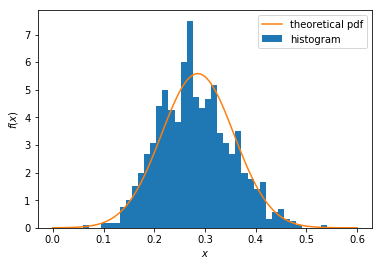

10


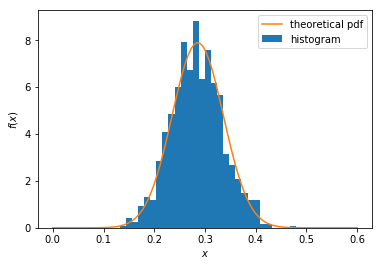

50


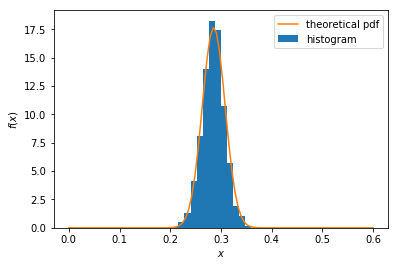

In [10]:
alpha = 2.0
beta = 5.0
samples_sizes = np.array([5, 10, 50])
samples_num = 1000
plot_range = np.array([0, 0.6])
hist_bar_num = 50

SolveTaskBetaDistribution(alpha, beta, samples_sizes, 
                              samples_num, plot_range, hist_bar_num)

# Выводы
### Опишите разницу между полученными распределениями при различных значениях n. 
С увеличением n график плотности распределения становится "уже", что является следствием уменьшения дисперсии.
### Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?
С ростом n точность аппроксимации возрастает.

-------

p.s. спасибо, что уделили время для ознакомления с моим "творчеством", с уважением, автор :)

p.s. p.s. я дерзнул использовать python 3.x, надеюсь, это не вызовет проблем при проверке